## Multi Instrument Plot
This tool downloads and visualizes time-series data of various instruments of a selected spacecraft including solar energetic particle intensities, solar wind plasma and magnetic field data. 

Selected remote-sensing observations such as radio spectrograms or X-ray light curves are also available.

#### Import tools and display options
Energy channel selection: click, hold and drag mouse, or hold Shift and click for range selection, or hold Ctrl/Cmd and click for selecting individual channels.

GOES manual satellite selection: check to manually pick GOES satellite during data loading. When left unchecked, the highest numbered satellite is picked automatically.


In [ ]:
import os
from seppy.util import jupyterhub_data_path
from multi_inst_plots import multi_inst_plot as m

In [ ]:
m.options.show()

#### Data directory

Define where to download files. Running this cell will set it to \<current directory\>/data, or if run on the project's JupyterHub server, set it to a common data folder in the base directory. Setting to None will use sunpy's default data directory. 

In [3]:
m.options.path = f"{os.getcwd()}{os.sep}data"
m.options.path = jupyterhub_data_path(m.options.path)

#### Define plot range (optional)

You can optionally define a smaller plotting range here. Re-run this cell after changing start/end dates.

In [ ]:
m.plot_range(m.options.startdate.value, m.options.enddate.value)

#### Load and plot data
Figure and axes are returned for further tweaking capability.

Loading L1 (Wind/SOHO) data for range: 2022-03-14 00:00:00 - 2022-03-16 00:00:00

Multi-index function only available (and necessary) for pitch-angle resolved fluxes. Skipping.

Multi-index function only available (and necessary) for pitch-angle resolved fluxes. Skipping.


Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

Fetching GOES-17 data for 2022-03-14 00:00:00 - 2022-03-16 00:00:00


Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

Plotting L1 (Wind/SOHO) data for timerange 2022-03-14 00:00:00 - 2022-03-16 00:00:00


2025-05-06 19:34:42 - sunpy - INFO: Obtained JPL HORIZONS location for Wind (spacecraft) (-8)         


INFO: Obtained JPL HORIZONS location for Wind (spacecraft) (-8)          [sunpy.coordinates.ephemeris]


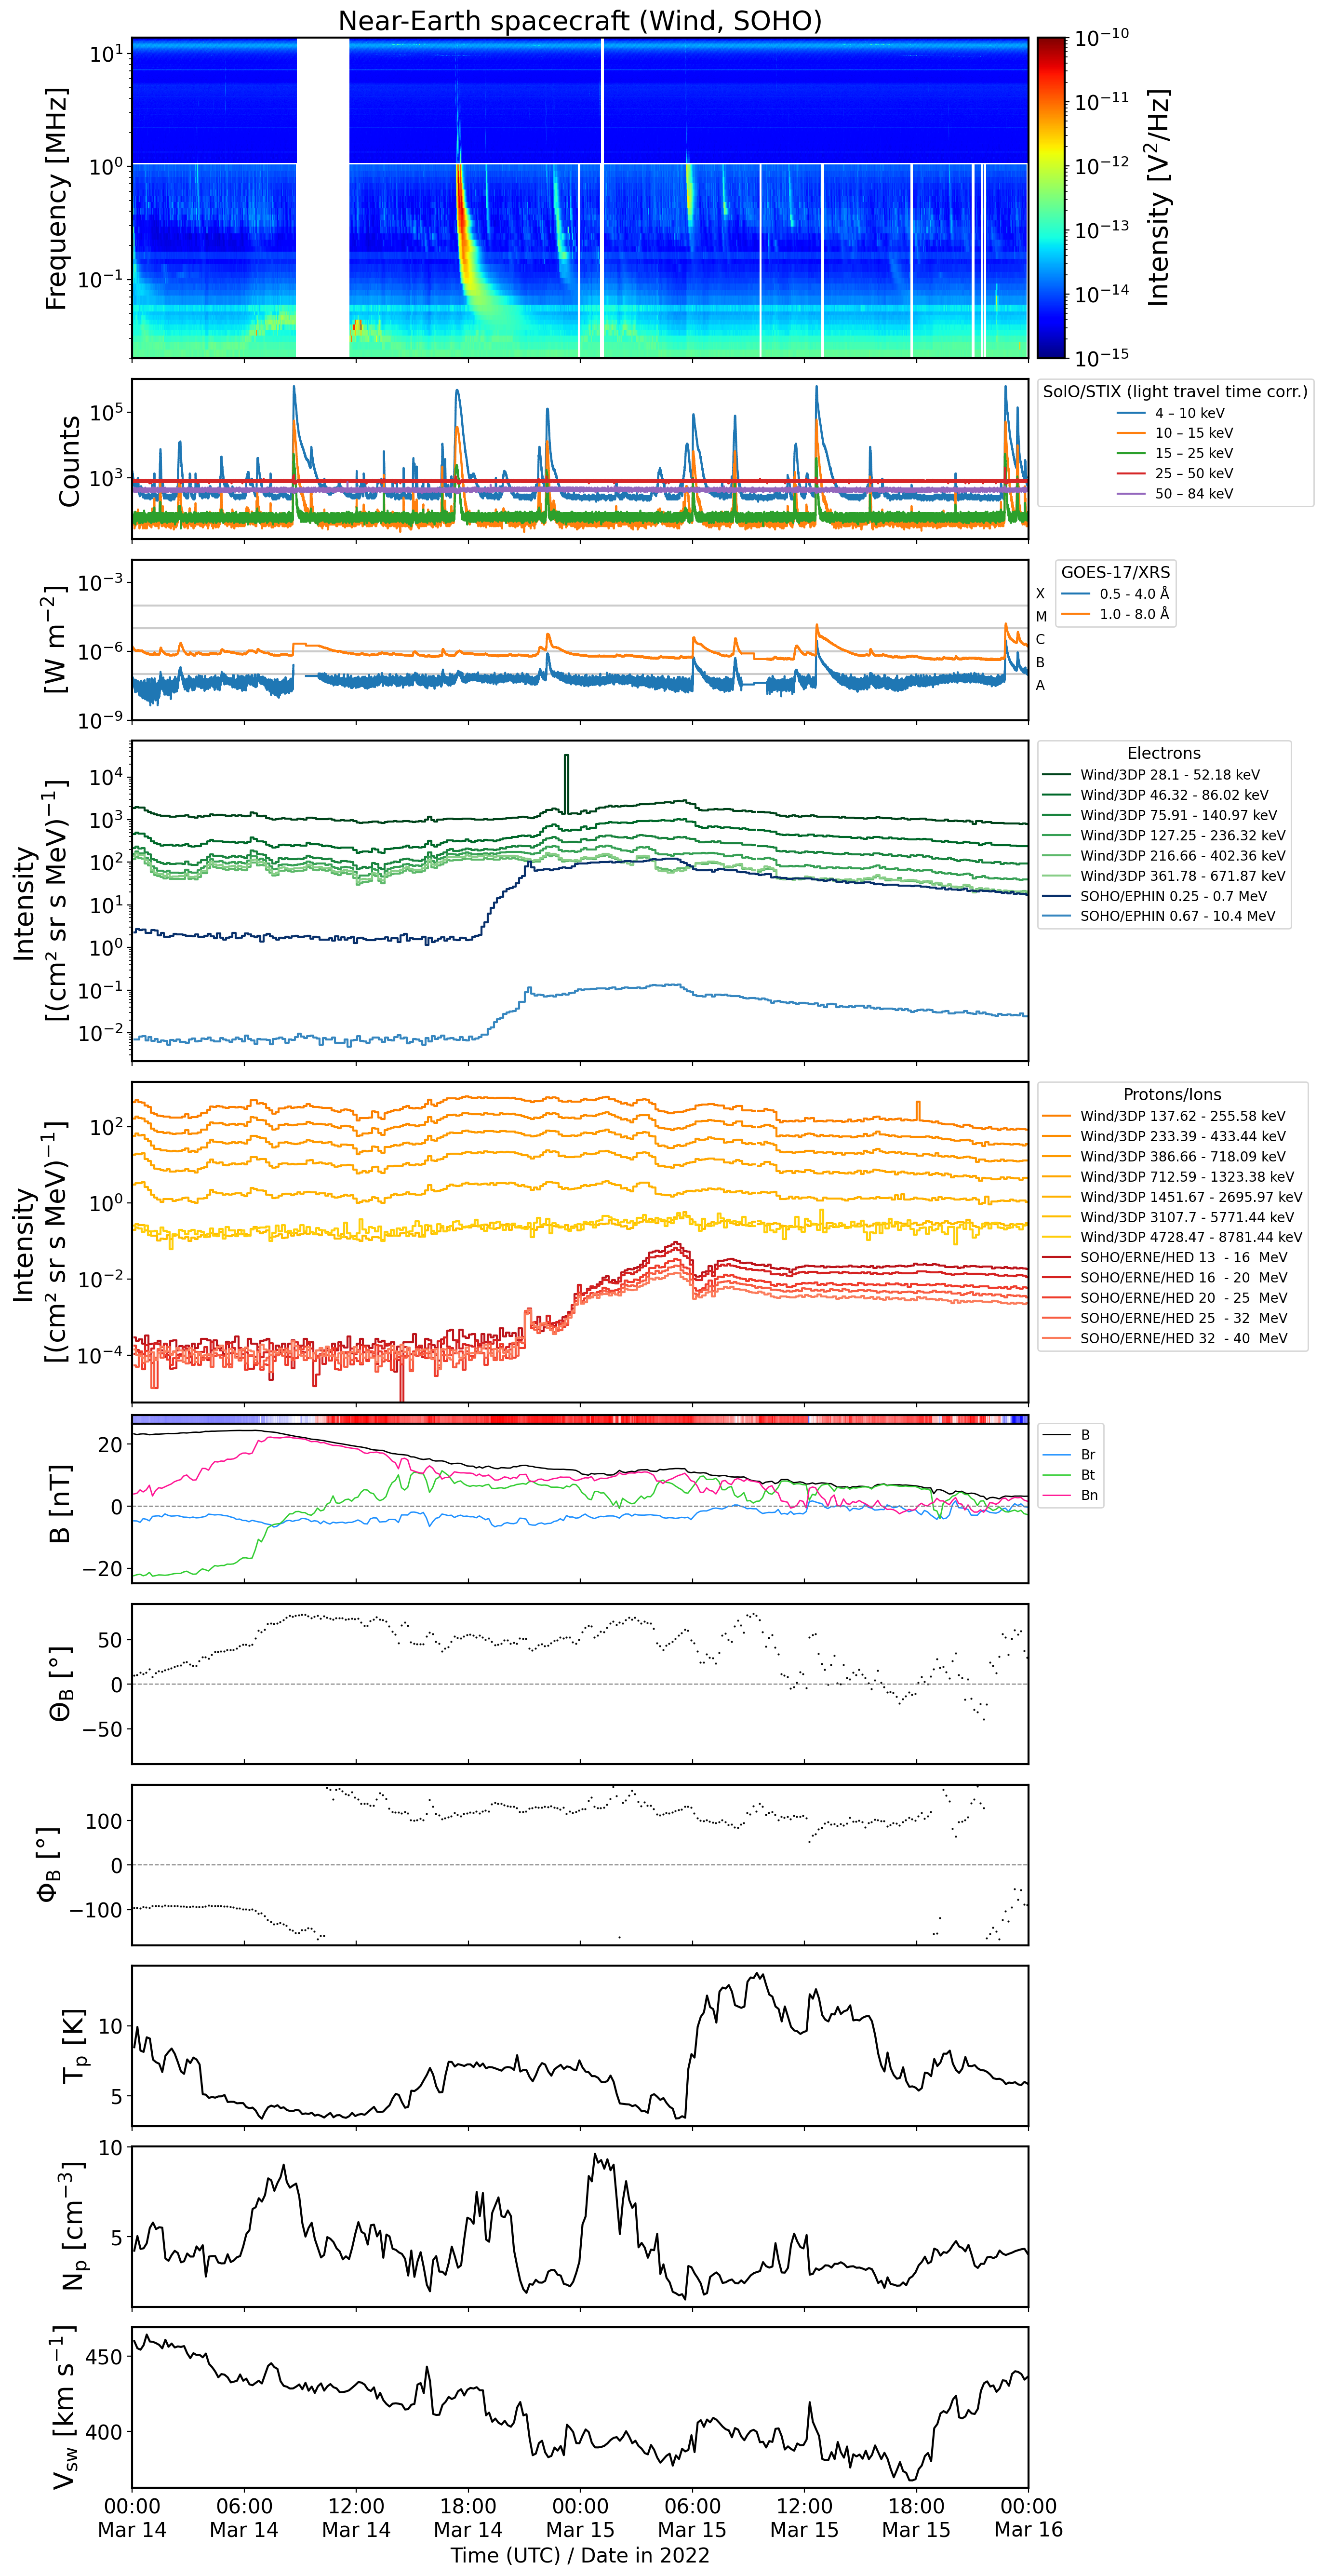

In [10]:
m.load_data()
fig, axs = m.make_plot()

### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar). Alternatively, run the following cell.

In [ ]:
fig.savefig("SEP_multi-instrument_plot.png", bbox_inches="tight")